# **AYUDANTÍA 3 - Introducción a la Ciencia de Datos - IMT2200**
- Rocío Ladrón de Guevara (rociohgj@uc.cl)
- Daniela Victorero (dvictorerol@uc.cl)



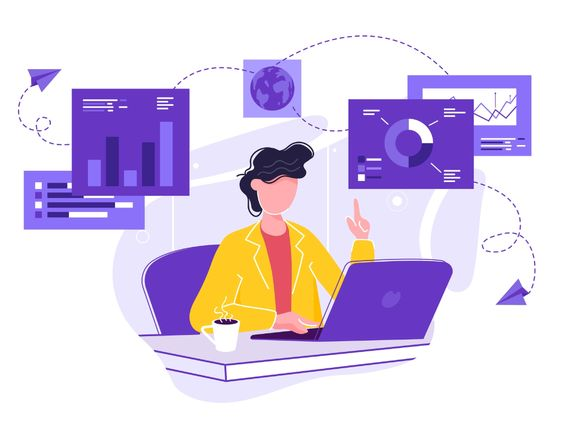

# **Webscrapping** 🕵️

¡Importaremos las librerías que usaremos en esta ayudantía!

In [2]:
import requests
import pandas as pd
import json
import numpy as np
from bs4 import BeautifulSoup as bs
from tables.table import Cols
import pyarrow.parquet as pq
import os
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'requests'

### ¿Que es Web scraping?

Web scraping o raspado web es una técnica utilizada mediante programas de software para extraer información de sitios web.​ Usualmente, estos programas simulan la navegación de un humano en la World Wide Web ya sea utilizando el protocolo HTTP manualmente, o incrustando un navegador en una aplicación.

**Fuente: Wikipedia**

## ¡Hagamos la prueba!

## Extraigamos el porcentaje de inscripciones total en carreras STEM por diferentes áreas de estudio en Chile.

Estas estadísticas las extraemos de Wikipedia [Mujeres_en_campos_de_CTIM](https://es.wikipedia.org/wiki/Mujeres_en_campos_de_CTIM#cite_note-:12-28)

Primer paso: con el comando request.
Solicitamos la información

In [ ]:
url = 'https://es.wikipedia.org/wiki/Mujeres_en_campos_de_CTIM#cite_note-:12-28'
page = requests.get(url).text

Extraemos la información

In [ ]:
soup = bs(page)

Buscamos la informacion/tabla que quermos trabajar.

In [ ]:
table=soup.find_all('table')[1]

Ahora ingresamos a la información y la adicionamos a un dataframe.

In [ ]:
from numpy.lib.shape_base import row_stack
#Creamos las columans de nuestro Data frame
df= pd.DataFrame(columns=['Area de Estudio','Porcetaje hombre 2015','Porcetaje mujer 2015','Porcetaje hombre 2016','Porcetaje mujer 2016','Cambio Porcentual hombre','Cambio Porcentual Mujer'])

#Buscamos las tablas que existen en la pagina de wikipedia. Si existe mas de una podemos acceder a la que queremos indicando su indice
table=soup.find_all('table')[1]

#Extrameos el contenido de las filas de la tabla.
rows = table.find_all('tr')



for r in rows[2::]:
  #Extraemos la informacion de una fila
  cols = r.find_all('td')
    print(cols)
  #Lo volvemos texto y lo almacenamos en una lista
  col_text = [c.text.strip() for c in cols]
  #Agregamos al Data frame
  df.loc[len(df)] = [col_text[0], col_text[1], col_text[2], col_text[3], col_text[4], col_text[5], col_text[6]]

df


,Area de Estudio,Porcetaje hombre 2015,Porcetaje mujer 2015,Porcetaje hombre 2016,Porcetaje mujer 2016,Cambio Porcentual hombre,Cambio Porcentual Mujer
0,Ciencias Sociales,"30,7%","69,3%","29,9%","70,1%","-0,8%",+ 0.8%
1,Educación,"30,2%","69,8%","27,4%","72,6%","-2,8%",+ 2.8%
2,Salud,"30,4%","69,6%","23,8%","76,2%","-6,6%",+ 6.6%
3,Tecnología,"81,8%","18,2%","78,2%","21,8%","-3,6%",+ 3.6%


## Otra forma de hacerlo es utilzando el método pd.read_html()

In [ ]:
df=pd.read_html(str(table))
df=pd.DataFrame(df[0])
df.head()

Unnamed: 0_level_0    2015           2016        Cambio en porcentaje  \
     Área de estudio Hombres  Mujer Hombres  Mujer              Hombres   
0  Ciencias Sociales   30,7%  69,3%   29,9%  70,1%                -0,8%   
1          Educación   30,2%  69,8%   27,4%  72,6%                -2,8%   
2              Salud   30,4%  69,6%   23,8%  76,2%                -6,6%   
3         Tecnología   81,8%  18,2%   78,2%  21,8%                -3,6%   

           
    Mujer  
0  + 0.8%  
1  + 2.8%  
2  + 6.6%  
3  + 3.6%

# **¡Analicemos los datos!**

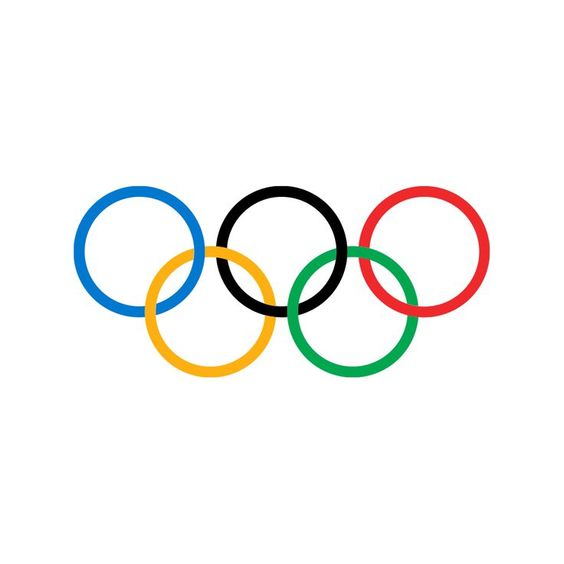

> ### Por motivo de los prontos Panamericano Santiago 2023, como personas curiosas, se nos ocurrió investigar la cantidad de medallas olímpicas que tienen los países.

> ### Nuestra curiosidad no quedó ahí, luego de buscar esa informacion en una tabla en Wikipedia se nos ocurre pensar en que puede existir algún elemento diferenciador existente en los países con mayor cantidad de medallas versus los de menor cantidad.

> ### Una hipótesis es que los países con menor IMC promedio podría ser los cuales tengan más medallas acumuladas.



## **¿Podremos validar esta hipótesis?**

Primero trabajaremos con la información de Indice de masa corporal de la población [IMC de los paises](https://es.wikipedia.org/wiki/Anexo:%C3%8Dndice_de_masa_corporal_de_la_poblaci%C3%B3n_por_pa%C3%ADs)

In [2]:
url = 'https://es.wikipedia.org/wiki/Anexo:%C3%8Dndice_de_masa_corporal_de_la_poblaci%C3%B3n_por_pa%C3%ADs'
page = requests.get(url).text


In [3]:
soup = bs(page)


In [4]:
tables=soup.find_all('table')
table=soup.find('table')


In [5]:
df1= pd.DataFrame(columns=['Pais','Media IMC','IMC en hombres', 'IMC mujeres', 'Hombres respecto a mujeres'])
table = soup.find('table')
rows = table.find_all('tr')

for r in rows[1:len(rows)-1:]:
  cols = r.find_all('td')
  col_text = [c.text.strip() for c in cols]
  df1.loc[len(df1)] = [col_text[0],float(col_text[1].replace(',','.')), float(col_text[3].replace(',','.')), float(col_text[5].replace(',','.')), float(col_text[7].replace(',','.'))]

df1




,Pais,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres
0,Afganistán,21.01,21.36,20.65,1.034
1,Albania,24.53,27.60,21.45,1.287
2,Argelia,23.87,24.38,23.36,1.044
3,Angola,22.73,23.24,22.22,1.046
4,Argentina,26.44,27.76,25.11,1.106
...,...,...,...,...,...
172,Venezuela,26.19,27.52,24.86,1.107
173,Vietnam,19.96,21.18,18.73,1.131
174,Yemen,22.07,22.91,21.22,1.080
175,Zambia,21.02,21.02,21.01,1.000


Como segundo paso trabajaremos con Medallero olimpico historico de los paises [Medallero olimpico historico](https://es.wikipedia.org/wiki/Anexo:Medallero_hist%C3%B3rico_de_los_Juegos_Ol%C3%ADmpicos_de_verano)

In [6]:
url = 'https://es.wikipedia.org/wiki/Anexo:Medallero_hist%C3%B3rico_de_los_Juegos_Ol%C3%ADmpicos_de_verano'
page = requests.get(url).text


In [7]:
soup = bs(page)


In [8]:
tables=soup.find_all('table')
table=soup.find('table')


In [9]:
from tables.table import Cols
df2= pd.DataFrame(columns=['Pais','Oro','Plata', 'Bronce', 'Total'])

table = soup.find('table')

rows = table.find_all('tr')

for r in rows[1:len(rows)-1:]:
  cols = r.find_all('td')
  col_text = [c.text.strip() for c in cols]

  df2.loc[len(df2)] = [col_text[1][0:-5].strip(),float(col_text[2].replace(',','.')),float(col_text[3].replace(',','.')), float(col_text[4].replace(',','.')),float(col_text[5].replace(',','.'))]

df2




,Pais,Oro,Plata,Bronce,Total
0,Estados Unidos,1069.0,842.0,744.0,2655.0
1,Unión Soviética,395.0,319.0,296.0,1010.0
2,Reino Unido,292.0,324.0,315.0,931.0
3,China,262.0,199.0,173.0,634.0
4,Alemania,239.0,267.0,291.0,797.0
...,...,...,...,...,...
148,Irak,0.0,0.0,1.0,1.0
149,Mauricio,0.0,0.0,1.0,1.0
150,Togo,0.0,0.0,1.0,1.0
151,Yibuti,0.0,0.0,1.0,1.0


Unimos ambos data frame con respecto a los paises, con el objetivo de relacionar ambas fuentes de información.

In [10]:
df3= df1.merge(df2, on='Pais')
df3

,Pais,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres,Oro,Plata,Bronce,Total
0,Afganistán,21.01,21.36,20.65,1.034,0.0,0.0,2.0,2.0
1,Argelia,23.87,24.38,23.36,1.044,5.0,4.0,8.0,17.0
2,Argentina,26.44,27.76,25.11,1.106,21.0,26.0,30.0,77.0
3,Armenia,24.26,25.72,22.80,1.128,2.0,8.0,8.0,18.0
4,Australia,26.10,27.24,24.95,1.092,162.0,170.0,209.0,541.0
...,...,...,...,...,...,...,...,...,...
119,Uzbekistán,23.80,24.99,22.60,1.106,10.0,6.0,20.0,36.0
120,Venezuela,26.19,27.52,24.86,1.107,3.0,7.0,9.0,21.0
121,Vietnam,19.96,21.18,18.73,1.131,1.0,3.0,1.0,5.0
122,Zambia,21.02,21.02,21.01,1.000,0.0,1.0,1.0,2.0


# ¡Ya con nuestro Data frame declarado procedemos a analizar!

Grafique Media IMC v/s Total (medallas totales).

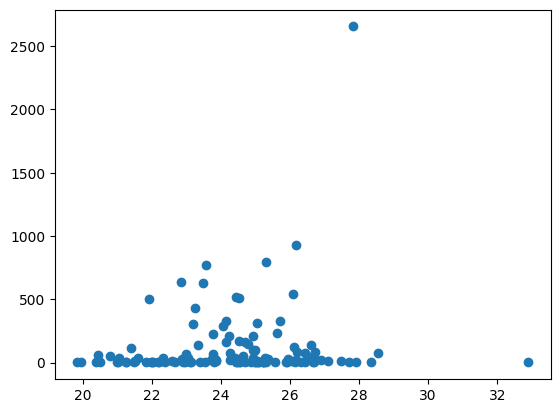

In [11]:
plt.scatter(df3['Media IMC'],df3['Total'])

In [13]:
df3[df3['Total']==df3['Total'].max()]

,Pais,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres,Oro,Plata,Bronce,Total
117,Estados Unidos,27.82,28.64,27.0,1.061,1069.0,842.0,744.0,2655.0


Muestre todos los paises con IMC menor a 20 pero mayor a 18.5

In [17]:
df3[(df3['Media IMC']<20) & (df3['Media IMC']>18.5)]

,Pais,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres,Oro,Plata,Bronce,Total
32,Eritrea,19.85,20.27,19.43,1.043,0.0,0.0,1.0,1.0
121,Vietnam,19.96,21.18,18.73,1.131,1.0,3.0,1.0,5.0


Muestre a los 10 paises con mayor cantidad de medallas totales y ordenelos por IMC promedio

In [31]:
#df3.sort_values('Total', ascending=False)
df4= (df3.sort_values(['Total','Pais'], ascending=False).head(10)).sort_values('Media IMC')
df4

,Pais,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres,Oro,Plata,Bronce,Total
58,Japón,21.93,23.52,20.34,1.156,169.0,150.0,180.0,499.0
20,China,22.86,23.78,21.93,1.084,262.0,199.0,173.0,634.0
56,Italia,23.49,25.78,21.19,1.217,222.0,195.0,215.0,632.0
38,Francia,23.56,24.90,22.22,1.121,231.0,256.0,285.0,772.0
48,Hungría,24.45,26.50,22.39,1.184,182.0,156.0,177.0,515.0
101,Suecia,24.54,26.11,22.97,1.137,149.0,177.0,181.0,507.0
41,Alemania,25.32,27.17,23.46,1.158,239.0,267.0,291.0,797.0
4,Australia,26.10,27.24,24.95,1.092,162.0,170.0,209.0,541.0
116,Reino Unido,26.19,27.62,24.76,1.116,292.0,324.0,315.0,931.0
117,Estados Unidos,27.82,28.64,27.00,1.061,1069.0,842.0,744.0,2655.0


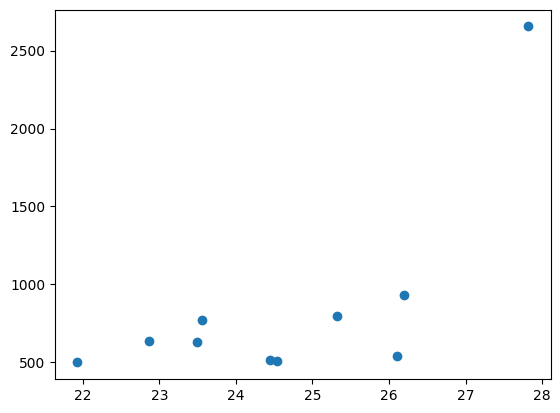

In [32]:
plt.scatter(df4['Media IMC'],df4['Total'])

Muestre a los 10 paises con mayor IMC promedio y a los 10 de menor IMC promedio.

Luego ordenelos de mayor a menor cantidad de medallas.

In [36]:
df5 = (df3.sort_values(['Media IMC','Pais'], ascending=False).head(10))
df6 = (df3.sort_values(['Media IMC','Pais'], ascending=True).head(10))
df7= pd.concat([df5,df6])
df7.sort_values('Total', ascending=False)

,Pais,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres,Oro,Plata,Bronce,Total
117,Estados Unidos,27.82,28.64,27.00,1.061,1069.0,842.0,744.0,2655.0
10,Bielorrusia,26.72,26.32,27.11,0.971,13.0,30.0,42.0,85.0
71,México,28.54,29.70,27.37,1.092,13.0,24.0,36.0,73.0
35,Etiopía,20.46,20.97,19.94,1.052,23.0,12.0,23.0,58.0
81,Corea del Norte,20.78,21.29,20.27,1.050,16.0,16.0,23.0,55.0
50,India,21.05,22.50,19.60,1.148,10.0,9.0,16.0,35.0
109,Trinidad y Tobago,26.90,26.46,27.33,0.968,3.0,5.0,11.0,19.0
7,Bahamas,27.09,27.60,26.57,1.039,8.0,2.0,6.0,16.0
90,Catar,27.47,27.98,26.96,1.038,2.0,2.0,4.0,10.0
121,Vietnam,19.96,21.18,18.73,1.131,1.0,3.0,1.0,5.0


### ¿Que podemos concluir?

In [37]:
df3.corr()

<ipython-input-37-cf5c64484bf6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df3.corr()


,Media IMC,IMC en hombres,IMC mujeres,Hombres respecto a mujeres,Oro,Plata,Bronce,Total
Media IMC,1.000000,0.925938,0.928868,-0.067878,0.142632,0.148392,0.142416,0.145579
IMC en hombres,0.925938,1.000000,0.720183,0.312129,0.197591,0.218320,0.230628,0.215987
IMC mujeres,0.928868,0.720183,1.000000,-0.430805,0.068355,0.058636,0.035569,0.055740
Hombres respecto a mujeres,-0.067878,0.312129,-0.430805,1.000000,0.156955,0.198128,0.247428,0.199195
Oro,0.142632,0.197591,0.068355,0.156955,1.000000,0.985758,0.962556,0.991046
Plata,0.148392,0.218320,0.058636,0.198128,0.985758,1.000000,0.988892,0.998358
Bronce,0.142416,0.230628,0.035569,0.247428,0.962556,0.988892,1.000000,0.989449
Total,0.145579,0.215987,0.055740,0.199195,0.991046,0.998358,0.989449,1.000000


## También podemos usar webscrapping para automáticamente descargar archivos en una página web 👀.

### Ejemplo - Tarea 1 - ¿Cómo podríamos haber automatizado la descarga de los datos de Yellow Taxi Trips Records para cada mes de los años 2019 y 2020?

Primero, antes debemos inspeccionar la página con el fin de saber cómo está construída, y de que manera se pueden obtener sus archivos.

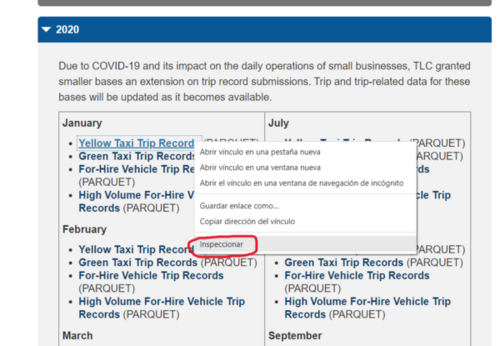

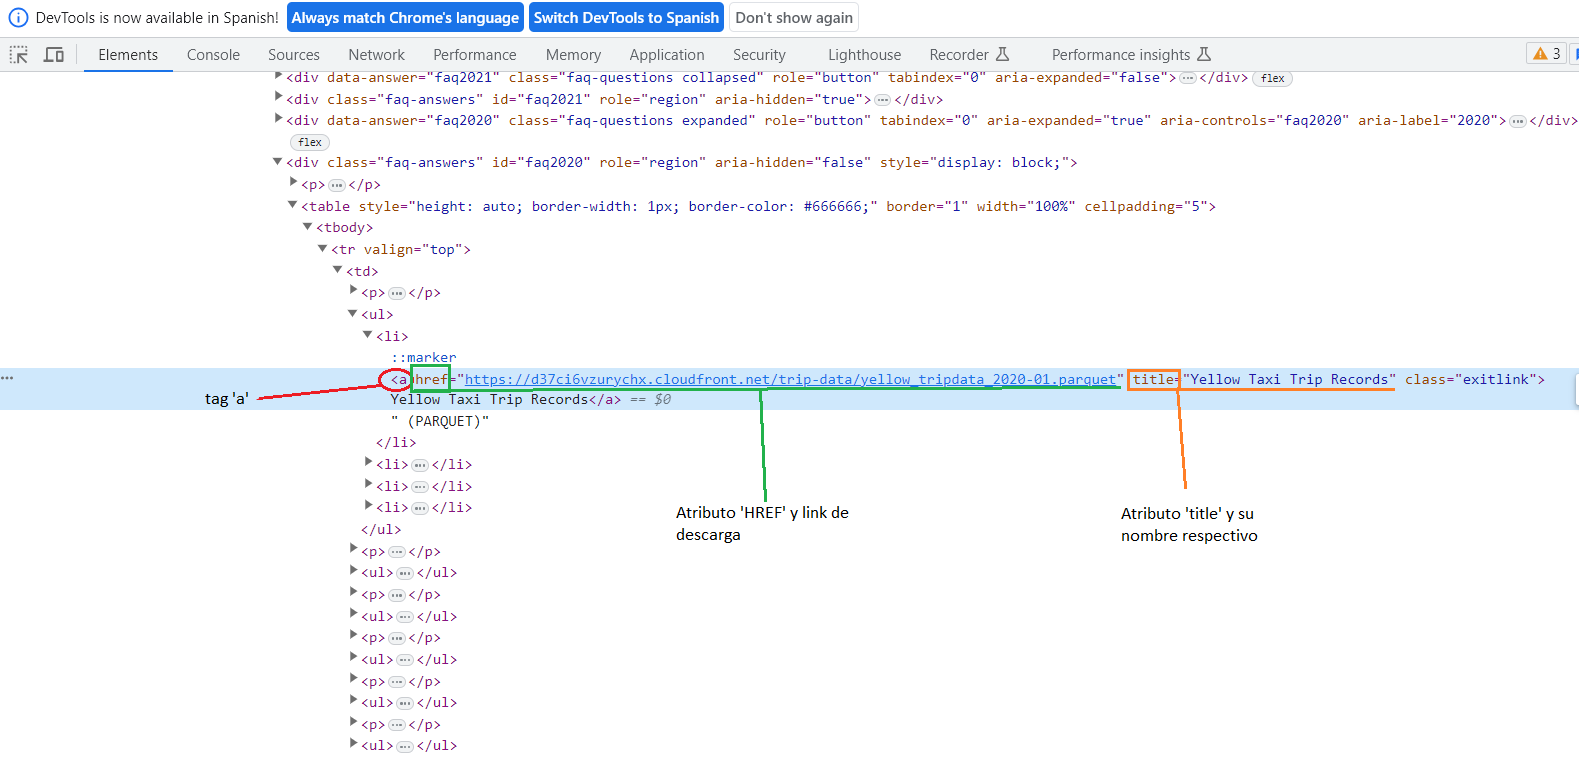

Conseguimos el texto de html de la página:

In [ ]:
page = requests.get("https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page") #página que buscamos scrappear
text = page.text
soup = bs(text, "html.parser")

Luego de inspeccionar la página, observamos que existe un link de descarga para cada dataset. Este link se encuentra en aquellas lineas que presentan la etiqueta 'a'. También, observamos que los datasets de "Yellow Taxi" que buscamos presentan el título "Yellow Taxi Trip Records".

Dentro de 'href', se encuentra el link a la descarga del archivo, y en este, se encuentran los años, por lo que filtramos '2019' o '2020'. Si cumple la condición, lo guardamos dentro de la lista.

In [ ]:
lista_url = []
for i in soup.find_all('a', {'title': 'Yellow Taxi Trip Records'}): #buscamos todos los tags 'a', y filtramos por el atributo de título.
    url = i['href']
    if '2019' in url or '2020' in url: #si contiene el año 2019 o 2020, guardamos el url de descarga en una lista.
        lista_url.append(url)

Utilizamos nuevamente requests para obtener el contenido de los links, y lo escribimos dentro de un archivo de extensión .parquet.

In [ ]:
for i in range(len(lista_url)): #iteramos por cada url de la lista.
    nombre_archivo = lista_url[i].split('/')[-1]
    response = requests.get(lista_url[i])
    ruta = os.path.join('data', nombre_archivo) #establecemos la ruta en donde queremos guardar el archivo, el cuál tendrá cómo nombre el final del link.
    #Debe existir la carpeta 'data' (en este caso) para poder guardar los archivos ahí.
    with open(ruta, "wb") as archivo: #escribimos el archivo. No agregamos '.parquet.' porque el nombre ya lo contiene.
        archivo.write(response.content) #escribimos el contenido del objeto 'response' obtenido.
        print(f'Archivo {nombre_archivo} guardado.')

Archivo yellow_tripdata_2020-01.parquet guardado.
Archivo yellow_tripdata_2020-02.parquet guardado.
Archivo yellow_tripdata_2020-03.parquet guardado.
Archivo yellow_tripdata_2020-04.parquet guardado.
Archivo yellow_tripdata_2020-05.parquet guardado.
Archivo yellow_tripdata_2020-06.parquet guardado.
Archivo yellow_tripdata_2020-07.parquet guardado.
Archivo yellow_tripdata_2020-08.parquet guardado.
Archivo yellow_tripdata_2020-09.parquet guardado.
Archivo yellow_tripdata_2020-10.parquet guardado.
Archivo yellow_tripdata_2020-11.parquet guardado.
Archivo yellow_tripdata_2020-12.parquet guardado.
Archivo yellow_tripdata_2019-01.parquet guardado.
Archivo yellow_tripdata_2019-02.parquet guardado.
Archivo yellow_tripdata_2019-03.parquet guardado.
Archivo yellow_tripdata_2019-04.parquet guardado.
Archivo yellow_tripdata_2019-05.parquet guardado.
Archivo yellow_tripdata_2019-06.parquet guardado.
Archivo yellow_tripdata_2019-07.parquet guardado.
Archivo yellow_tripdata_2019-08.parquet guardado.


Si observamos la carpeta 'data' creada, luego de terminar el tiempo de ejecución los archivos estarán ahí.

Finalmente, hay que considerar que no todos los sitios web son iguales, y la manera de obtener información de estos puede variar considerablemente, por lo que hay que siempre inspeccionar la página web para saber cómo tratar con los datos.